<a href="https://colab.research.google.com/github/nexustech101/colab-notebooks/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression Documentation

## Introduction

### Linear Regression
Linear regression models the relationship between the dependent variable (target) and one or more independent variables (features) using a linear function. The model predicts the target variable as a linear combination of the features plus an intercept (bias).


### Equation:
y=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +…+β
n
​
 x
n
​


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error as skl_mse, r2_score as skl_r2, mean_absolute_error as skl_mae

class PolynomialRegression:
    """Custom implementation of polynomial regression."""

    def __init__(self, degree=2, lr=0.001, n_iters=1000):
        """
        Initialize the PolynomialRegression model.

        Parameters:
        - degree (int): The degree of the polynomial features.
        - lr (float): Learning rate for gradient descent.
        - n_iters (int): Number of iterations for training.
        """
        self.degree = degree
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.poly = PolynomialFeatures(degree)

    def fit(self, x, y, animate=False):
        """
        Fit the model to the training data.

        Parameters:
        - x (numpy array): Input features.
        - y (numpy array): Target values.
        - animate (bool): Whether to animate the training process (not implemented here).
        """
        # Transform features to polynomial features
        x_poly = self.poly.fit_transform(x)
        n_samples, n_features = x_poly.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ensure y is a 1D array
        y = np.ravel(y)  # Flatten y to ensure it is a 1D array

        # Ensure that y has the correct number of samples
        if y.shape[0] != x_poly.shape[0]:
            raise ValueError("The number of samples in y must match the number of samples in x.")

        # Training loop
        for _ in range(self.n_iters):
            y_predicted = np.dot(x_poly, self.weights) + self.bias
            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(x_poly.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        # Check for NaN values in weights and bias
        if np.any(np.isnan(self.weights)) or np.any(np.isnan(self.bias)):
            raise ValueError("Weights or bias contain NaNs after fitting")

    def predict(self, x):
        """
        Predict using the trained model.

        Parameters:
        - x (numpy array): Input features.

        Returns:
        - numpy array: Predicted values.
        """
        x_poly = self.poly.transform(x)
        y_predicted = np.dot(x_poly, self.weights) + self.bias
        return y_predicted

    def print_weights(self):
        """
        Print the learned weights and bias.
        """
        print("Learned Weights:", self.weights)
        print("Learned Bias:", self.bias)


X_train_scaled shape: (80, 1)
y_train shape: (80,)


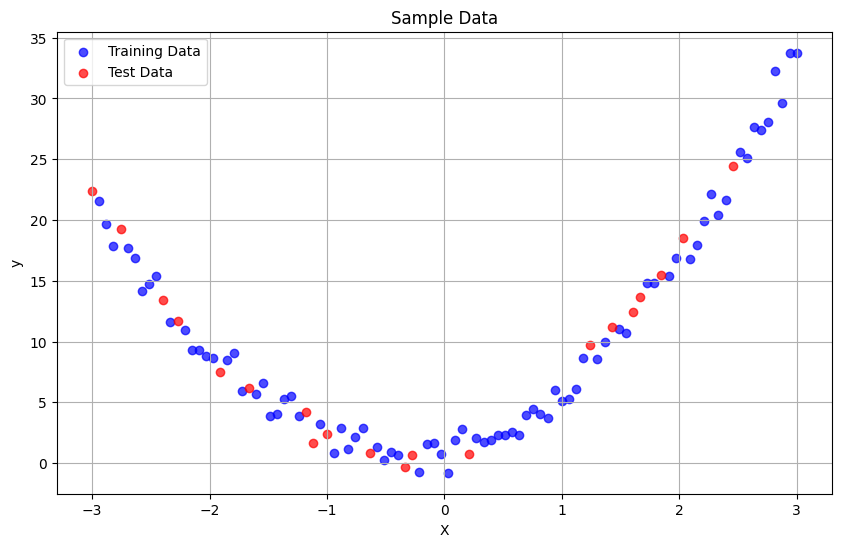

Learned Weights: [0.65409593 4.16711346 9.01448818]
Learned Bias: 0.6540959252081334

Mean Squared Error: 0.7854475413499692
R^2 Score: 0.9860796014996471
Mean Absolute Error: 0.7588620022579402


In [ ]:
# Example data (to ensure y is a 1D array)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = (1 + 2 * X + 3 * X**2 + np.random.randn(100, 1)).flatten()  # Flatten y to make it 1D

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Debugging: Print shapes before fitting
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")

# Graph sample data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Data', color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data')
plt.legend()
plt.grid(True)
plt.show()

# Initialize and train the Polynomial Regression model
poly_model = PolynomialRegression(degree=2, lr=0.01, n_iters=1000)
poly_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = poly_model.predict(X_test_scaled)

# Print learned weights and bias
poly_model.print_weights()

# Print metrics
print("Mean Squared Error:", skl_mse(y_test, y_pred))
print("R^2 Score:", skl_r2(y_test, y_pred))
print("Mean Absolute Error:", skl_mae(y_test, y_pred))

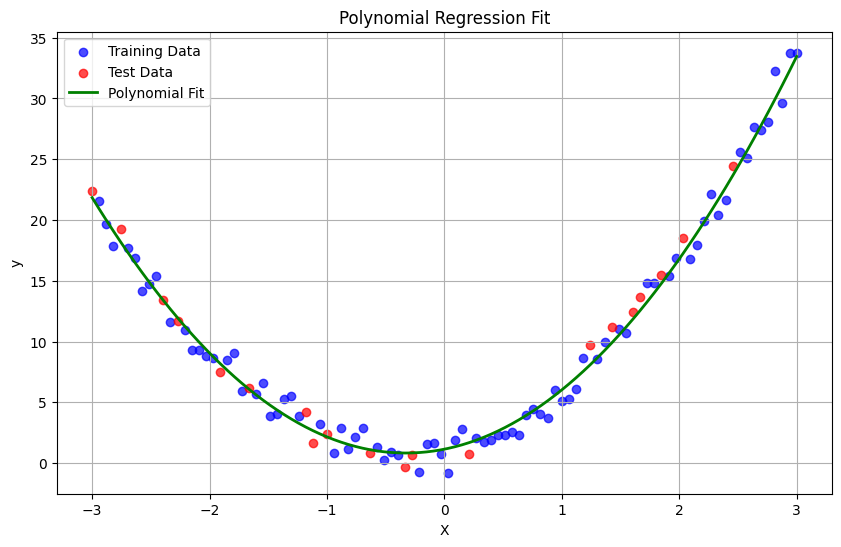

In [ ]:
# Plot the polynomial regression curve with training and test data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Data', color='red', alpha=0.7)

# Sort the data points to ensure the curve is smooth
X_sorted = np.sort(X, axis=0)
X_sorted_scaled = scaler.transform(X_sorted)
y_sorted_pred = poly_model.predict(X_sorted_scaled)

# Plot the polynomial curve
plt.plot(X_sorted, y_sorted_pred, color='green', linewidth=2, label='Polynomial Fit')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.show()
